# Laboratorijska vježba iz predmeta Teorija informacije

&copy; Jasna Janković, mag. ing., prof. dr. sc. Željko Ilić

Sadržaj:

* [Teorija informacije, kapacitet kanala, Markovljevi lanci](#1)
    * [Izvorište](#11)
        * [Zadatak 1](#12)
    * [Vjerojatnosni opis diskretnog komunikacijskog sustava](#13)
        * [Zadatak 2](#14)
    * [Informacijske mjere](#15)
        * [Zadatak 3](#16)
        * [Zadatak 4](#17)
        * [Zadatak 5](#18)
    * [Izvorište s memorijom](#19)
        * [Zadatak 6](#110)
    * [Diskretni komunikacijski kanal](#111)
        * [Zadatak 7](#112)
* [Entropijsko kodiranje](#2)
    * [Shannon-Fano kodiranje](#21)
        * [Zadatak 8](#22)
    * [Huffman kodiranje](#23)
        * [Zadatak 9](#24)
        * [Zadatak 10](#25)
    * [Aritmetičko kodiranje](#26)
        * [Zadatak 11](#27)
    * [Metode rječnika](#28)
        * [LZ77](#29)
            * [Zadatak 12](#210)
        * [LZW](#211)
            * [Zadatak 13](#212)
* [Zaštitno kodiranje](#3)
    * [Paritetno kodiranje](#31)
        * [Zadatak 14](#32)
    * [Hammingovo kodiranje](#33)
        * [Zadatak 15](#34)
    * [Ciklično kodiranje](#35)
        * [Zadatak 16](#36)
    * [Konvolucijsko kodiranje](#37)
        * [Opcionalno: Zadatak 17](#38)
* [Literatura](#R)
        

Laboratorijska vježba iz predmeta Teorija informacije sastoji se od 3 cjeline:
1. Teorija informacije, kapacitet diskretnog komunikacijskog kanala i Markovljevi lanci
2. Entropijsko kodiranje
3. Zaštitno kodiranje

slijedno obrađene u ovoj bilježnici te time prati gradivo obrađeno na nastavi. Programski kodovi su napisani u Pythonu, a sve potrebne biblioteke se učitavaju izvršavanjem prvog odsječka koda. **Za izvršavanje pojedinog odsječka koda potrebno je klikom označiti željenu ćeliju (prozor u kojem se kôd nalazi) i kliknuti na gumb *Run* u izborniku.** Rezultat izvršavanja (ako postoji ispis) prikazat će se neposredno ispod izvršenog odsječka koda. **Pri svakom pokretanju bilježnice potrebno je izvršiti prvi odsječak koda kako bi se učitale sve potrebne biblioteke.**

<font color='red'>U većini zadataka zadan je dio koda, a od studenata se očekuje dopuniti komentirani dio koda označen oznakom `...` kako bi se postigla tražena funkcionalnost, odnosno ispisao rezultat. Osim komentiranih linija s oznakom `...`, dodane su i komentirane pomoćne linije ispisa međurješenja za čiji ispis je samo potrebno odkomentirati navedene linije. Dakle, postupak rješavanja zadataka u ovoj bilježnici sastoji se od sljedećih koraka:</font>
- <font color='red'>odkomentirati linije koda s oznakom `...` (komentirane linije koda počinju oznakom `#`)</font>
- <font color='red'>dopisati potreban kôd prema tekstu zadatka</font>
- <font color='red'>kliknuti na Run</font>
- <font color='red'>ispod pokrenutog odsječka koda treba se ispisati traženi rezultat izvršavanja.</font>

Za početak, odkomentirajte liniju koda 10 u sljedećem odsječku, te varijabli `sval` umjesto `...` dodijelite vrijednost zbroja posljednje znamenke JMBAG-a svakog studenta laboratorijske grupe te izvršite odsječak klikom na *Run*.

In [1]:
from math import log2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import heapq
from codes.lz77 import encode_lz77
from codes.lzw import encode_lzw
import sk_dsp_comm.fec_block as block

#1 - Ernest Toth
sval = 1
np.random.seed(sval)
print ("Seed set to", sval)

Seed set to 1


> I didn’t like the term Information Theory. Claude didn’t like it either. You see, the term ‘information theory’ suggests that it is a theory about information – but it’s not. It’s the transmission of information, not information. Lots of people just didn’t understand this… 
>
> -- <cite>Interview with R. Fano, 2001</cite>

Sustav prijenosa informacije može se jednostavno prikazati sljedećom slikom.

![Jednostavan prikaz prijenosa informacije](img/information_transmission_hr.png)

Pri tome, izvorište generira određenu informaciju (poruku), predajnik ju obradi na način da bude prikladna za slanje, a prijamnik ju prima i obradi tako da bude razumljiva odredištu. Kanal je medij kojim se informacija šalje. Detaljniji prikaz ovog sustava prikazan je na sljedećoj slici.

![Prikaz sustava prijenosa informacije](img/information_system_hr.png)

Ova laboratorijska vježba obrađuje većinu dijelova ovog sustava, a studenti s više interesa o području upućuju se na [[1-2]](#R).

<a id =1> </a>
## 1. Teorija informacije, kapacitet diskretnog komunikacijskog kanala i Markovljevi lanci

Prva cjelina laboratorijske vježbe obrađuje izvorište, odredište te diskretni komunikacijski kanal. Također, definirane su osnovne informacijske mjere koje služe za konkretnije definiranje pojedinih dijelova sustava.

<a id =11> </a>
### Izvorište

Izvorište je komponenta sustava koja generira određenu informaciju. Ovisno o izvorištu, informaciju mogu činiti brojke, slova ili drugi znakovi koje jednim imenom nazivamo *simbolima*. Svako izvorište raspolaže konačnim skupom simbola, a slijed simbola koji nastaje uzastopnim generiranjem naziva se *poruka*. Svaki od simbola u poruci donosi određenu *količinu informacije*. S obzirom na to da li pojava (generiranje) novog simbola ovisi o prethodnome postoje dvije vrste izvorišta:
* Diskretno bezmemorijsko izvorište
* Diskretno memorijsko izvorište

**Diskretno bezmemorijsko izvorište**

Za potrebe analize, diskretno bezmemorijsko izvorište se može definirati kao diskretna slučajna varijabla (npr. $X$) koja poprima vrijednosti iz skupa simbola $\{x_1, ..., x_i, ..., x_n\}$ pri čemu svaki simbol ima određenu vjerojatnost pojavljivanja $p(x_i)$. Dakle:

|   |   |
|---|---|
| Izvorište | $X=\{x_1, ..., x_i, ..., x_n\}$ |
| Vjerojatnosti pojavljivanja simbola | $[p(x_i)]=[p(X)]=[p(x_1) ... p(x_i) ... p(x_n)]$ |
| Poruka | $x_1x_2...x_k$ |
| Količina informacije koju donosi simbol $x_i$ | $I(x_i)=-log_2p(x_i) [bit/simbol]$ |
| Količina informacije poruke $x_1x_2...x_k$ | $I(x_1x_2...x_k)=-log_2(p(x_1)\cdot p(x_2)\cdot ...\cdot p(x_k)) [bit/poruka]$ |

---
**Zadatak 1** <a id =12> </a>
Diskretno bezmemorijsko izvorište $X$ generira simbole iz skupa {a,b,c,d} s vjerojatnostima pojavljivanja $[p(X)]=[0.4, 0.3, 0.2, 0.1]$. 

Za modeliranje izvorišta u Pythonu koristimo jednostavne [liste](https://docs.python.org/3/tutorial/datastructures.html), [numpy liste](https://numpy.org/doc/stable/reference/generated/numpy.array.html) za pohranu brojčanih vrijednosti i/ili [rječnike](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) (vidi odlomak koda ispod).

(a) Za navedeno izvorište izračunajte količinu informacije po pojedinom simbolu, $I(x_i), i \in \{1,2,3,4\}$.
    Koji simbol donosi najveću količinu informacije? Objasnite!
    
(b) Iz izvorišta generirajte poruku duljine 5 simbola te izračunajte količinu informacije dobivene poruke.
    Poruka se može generirati pozivanjem funkcije [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) (vidi odlomak koda ispod).

In [2]:
X_symbols = ['a','b','c','d']
p_X = np.array([0.4, 0.3, 0.2, 0.1])

X = dict(zip(X_symbols, p_X.tolist()))
print("X =", X)

X = {'a': 0.4, 'b': 0.3, 'c': 0.2, 'd': 0.1}


In [3]:
# (a) kolicina informacije po simbolu
I_x1 = -log2(p_X[0])
I_x2 = -log2(p_X[1])
I_x3 = -log2(p_X[2])
I_x4 = -log2(p_X[3])
print("I(x1) =",I_x1, "[bit/simbol]")
print("I(x2) =",I_x2, "[bit/simbol]")
print("I(x3) =",I_x3, "[bit/simbol]")
print("I(x4) =",I_x4, "[bit/simbol]")

I(x1) = 1.3219280948873622 [bit/simbol]
I(x2) = 1.7369655941662063 [bit/simbol]
I(x3) = 2.321928094887362 [bit/simbol]
I(x4) = 3.321928094887362 [bit/simbol]


In [4]:
# (b) kolicina informacije poruke
np.random.seed(sval+1)
message = np.random.choice(X_symbols, size = 5, p = p_X)
print("message: ", message)

msg_cnt = [0 for i in range(4)]
for i in range(5):
    msg_cnt[(ord(message[i]) - ord('a'))] += 1
print(msg_cnt)
I_message = -1*sum([msg_cnt[i]*log2(p_X[i]) for i in range(4) if msg_cnt[i]])
print("I(message) =", I_message, "[bit/poruka]")

message:  ['b' 'a' 'b' 'b' 'b']
[1, 4, 0, 0]
I(message) = 8.269790471552188 [bit/poruka]


<a id =13> </a>
### Vjerojatnosni opis diskretnog komunikacijskog sustava

Diskretni komunikacijski sustav može biti definiran *vjerojatnosnim opisom* koji sadrži:
* vjerojatnosti pojava simbola na ulazu, npr. za ulaz $X=\{x_1,...,x_n\}$ vjerojatnosti $[p(x_i)]$
* vjerojatnosti pojava simbola na izlazu, npr. za izlaz $Y=\{y_1,...,y_m\}$ vjerojatnosti $[p(y_j)]$
* vjerojatnosti pojava simbola na ulazu i izlazu u međusobnoj ovisnosti, odnosno uključujući karakteristike komunikacijskog kanala

Gledano sa strane ulaza, potpuni opis sustava definiran je skupom vjerojatnosti na ulazu $p(x_i)$ te skupom uvjetnih vjerojatnosti $p(y_j|x_i)$ (vjerojatnosti pojave simbola $y_j$ na izlazu ako se na ulazu pojavio simbol $x_i$, tzv. *unaprijednih vjerojatnosti prijelaza*).

Sa strane izlaza, sustav je definiran skupom vjerojatnosti na izlazu $p(y_j)$ te skupom uvjetnih vjerojatnosti $p(x_i|y_j)$ (vjerojatnosti da je na ulazu bio simbol $x_i$ ako se na izlazu pojavio simbol $y_j$, tzv. *unazadnih vjerojatnosti prijelaza*).

Istovremenim promatranjem ulaza i izlaza, gledamo pojavu para simbola $(x_i,y_j)$, definiranu *združenom vjerojatnosti* $p(x_i,y_j)$ (vjerojatnosti istovremene pojave simbola $x_i$ na ulazu i $y_j$ na izlazu).

U nastavku su dane zakonitosti vjerojatnosnog opisa komunikacijskog sustava.

* Skup simbola na ulazu/izlazu je potpun.
<center> $\sum_{i=1}^n p(x_i) = \sum_{j=1}^m p(y_j) = 1$ </center>
* Vjerojatnost pojave nekog simbola je zbroj vjerojatnosti pojava svih parova u kojima se taj simbol pojavljuje.
<center> $p(x_i)=\sum_{j=1}^m p(x_i,y_j)$ </center>
<center> $p(y_j)=\sum_{i=1}^n p(x_i,y_j)$ </center>
* Veza između tri načina potpunog opisa sustava:
<center> $p(x_i,y_j)=p(x_i)p(y_j|x_i)=p(y_j)p(x_i|y_j)$
* Prijelaz iz unaprijedne vjerojatnosti prijelaza u unazadnu vjerojatnost prijelaza:
<center> $p(x_i|y_j)=\frac{p(x_i,y_j)}{p(y_j)}=\frac{p(x_i,y_j)}{\sum_{i=1}^n p(x_i,y_j)}=\frac{p(x_i)p(y_j|x_i)}{\sum_{i=1}^n p(x_i)p(y_j|x_i)}$ </center>

Opisani skupovi vjerojatnosti jednostavno se zapisuju pomoću `numpy` objekata ([vektora]((https://numpy.org/doc/stable/reference/generated/numpy.array.html)) i/ili [matrica](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html)), a osnovne [operacije](https://numpy.org/doc/stable/user/absolute_beginners.html) nad objektima također su podržane bibliotekom.


---
**Zadatak 2** <a id =14> </a>
Diskretnim komunikacijskim kanalom prenose se simboli $X=\{a,b,c\}$ s vjerojatnostima pojavljivanja $p(a)=2p(b)=2p(c)$. Vjerojatnost pojave odaslanog (istog) simbola na izlazu je 80%, dok su vjerojatnosti pojave drugih simbola, različitih od odaslanog, jednake za sve preostale simbole. Potrebno je izračunati vjerojatnosti pojave pojedinog simbola na izlazu iz kanala. 

In [5]:
p_X = np.array([0.5, 0.25, 0.25])
# uvjetne vjerojatnosti prijelaza
p_YIX = np.array([   [0.8, 0.1, 0.1],
                     [0.1, 0.8, 0.1],
                     [0.1, 0.1, 0.8]])
# zdruzene vjerojatnosti (skalarno množenje stupca p_X i matrice p_YIX)
p_XY = p_X[:, np.newaxis]*p_YIX
# vjerojatnosti na izlazu (zbroj elemenata matrice po stupcima)
p_Y = np.sum(p_XY,0)
print ("[p(Y)] = ", p_Y)

[p(Y)] =  [0.45  0.275 0.275]


<a id =15> </a>
### Informacijske mjere

Informacijske mjere opisuju sadržaj informacije i prijenos informacije u komunikacijskom sustavu. Temelje se na vjerojatnosnim zakonitostima sustava, a predstavljaju *srednje vrijednosti veličina* čime daju generalnu sliku o sustavu. 

![Informacijske mjere](img/information_measures_hr.png)

Informacijske mjere su prikazane u nastavku.

* Entropija na ulazu, $H(X)$
    <center> $H(X)=-\sum_{i=1}^n p(x_i) log_2 p(x_i)$ [bit/simbol] </center>
* Entropija na izlazu, $H(Y)$
    <center> $H(Y)=-\sum_{i=1}^n p(y_i) log_2 p(y_i)$ [bit/simbol] </center>
* Združena entropija, $H(X,Y)$
    <center> $H(X,Y)=-\sum_{i=1}^n \sum_{j=1}^m p(x_i,y_j) log_2 p(x_i,y_j) $ [bit/simbol] </center>
* Entropija šuma (irelevantnost), $H(Y|X)$
    <center> $H(Y|X)=-\sum_{i=1}^n \sum_{j=1}^m p(x_i,y_j) log_2 p(y_j|x_i) $ [bit/simbol] </center>
* Ekvivokacija (mnogoznačnost), $H(X|Y)$
    <center> $H(X|Y)=-\sum_{i=1}^n \sum_{j=1}^m p(x_i,y_j) log_2 p(x_i|y_j) $ [bit/simbol] </center>
* Srednji uzajamni sadržaj informacije (transinformacija), $I(X;Y)$
    <center> $I(X;Y)=\sum_{i=1}^n \sum_{j=1}^m p(x_i,y_j) log_2 \frac{p(x_i,y_j)}{p(x_i)p(y_j)}$ [bit/simbol] </center>

---
**Zadatak 3** <a id =16> </a>
Za komunikacijski sustav iz [zadatka 2](#14) odredite sve prethodno navedene informacijske mjere.

In [6]:
# entropija na ulazu
H_X = -np.sum(p_X*np.log2(p_X))
# entropija na izlazu
H_Y = -np.sum(p_Y*np.log2(p_Y))
# zdruzena entropija
H_XY = -np.sum(p_XY*np.log2(p_XY))
# entropija suma (irelevantnost)
H_YuzX = -np.sum(p_XY*np.log2(p_YIX)) #tj. H_XY - H_X
# ekvivokacija (mnogoznacnost)
H_XuzY = H_XY - H_Y
# srednji uzajamni sadržaj informacije (transinformacija)
I_XY = H_X + H_Y - H_XY

print("H(X) =", H_X, "[bit/simbol]")
print("H(Y) =", H_Y, "[bit/simbol]")
print("H(X,Y) =", H_XY, "[bit/simbol]")
print("H(Y|X) =", H_YuzX, "[bit/simbol]")
print("H(X|Y) =", H_XuzY, "[bit/simbol]")
print("I(X;Y) =", I_XY, "[bit/simbol]")


H(X) = 1.5 [bit/simbol]
H(Y) = 1.5427744539878083 [bit/simbol]
H(X,Y) = 2.4219280948873623 [bit/simbol]
H(Y|X) = 0.9219280948873624 [bit/simbol]
H(X|Y) = 0.879153640899554 [bit/simbol]
I(X;Y) = 0.620846359100446 [bit/simbol]


---
**Zadatak 4** <a id =17> </a>
Zadan je odlomak teksta `text`. Histogram prikazuje broj ponavljanja pojedinog znaka teksta. Izračunajte *srednji sadržaj informacije* zadanog odlomka teksta. Abecedno sortirani znakovi (simboli) koji se pojavljuju u odlomku pohranjeni su u listi `unique_chars`, dok je broj ponavljanja svakog znaka pohranjen u listi `char_counts`.

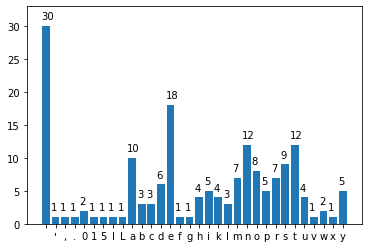

In [7]:
text = "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book.";
n_chars = len(set(text))
char_list = list(text)
char_list.sort()
unique_chars = list(set(text))
unique_chars.sort()
# print("unique_chars: ", unique_chars)
char_counts, bins, _ = plt.hist(char_list, bins=np.arange(n_chars+1)-0.5, align='mid', rwidth=0.8)
# print("char_counts: ", char_counts)
plt.ylim(0,33)
for i in range(n_chars):
    plt.text(bins[i],char_counts[i]+1,str(int(char_counts[i])))

In [8]:
# srednji sadrzaj informacije odlomka
char_p = np.array(char_counts)*(1/len(text))
H_izvor = sum(-np.log2(char_p)*char_p)
print(len(text)*H_izvor,"[bit]") #informacija odlomka = broj_simbola * entropija

733.6370574270953 [bit]


---
**Zadatak 5** <a id =18> </a>
Za zadanu sliku `parrot` potrebno je izračunati gubitak informacije prilikom transformiranja slike u crno-bijelu skalu. Za obradu slike koristi se Python biblioteka [`PIL`](https://pillow.readthedocs.io/en/stable/), odnosno objet [`Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html). Slika se transformira u crno-bijelu skalu funkcijom `convert('L')` (vidi kôd i dokumentaciju). Za jednostavno računanje, slika je iz 2D formata pretvorena u jednodimenzionalni niz (listu) piksela. Svaki je piksel predstavljen kombinacijom četiri broja u RGB zapisu, odnosno jednim brojem u L zapisu ([vidi više](https://pillow.readthedocs.io/en/stable/handbook/concepts.html)). Pikseli su pohranjeni u [rječnik](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) tako da je *ključ* opisani zapis piksela, a *vrijednost* broj ponavljanja piksela (vidi kôd). Osim njega, mogu se koristiti liste `unique_col_px`, odnosno `unique_gray_px`, koje predstavljaju liste svih piksela koji se pojavljuju u obojanoj, odnosno crno-bijeloj slici te liste `col_px_counts`, odnosno `gray_px_counts`, koje sadrže broj ponavljanja pojedinog piksela u obojanoj, odnosno crno-bijeloj slici.


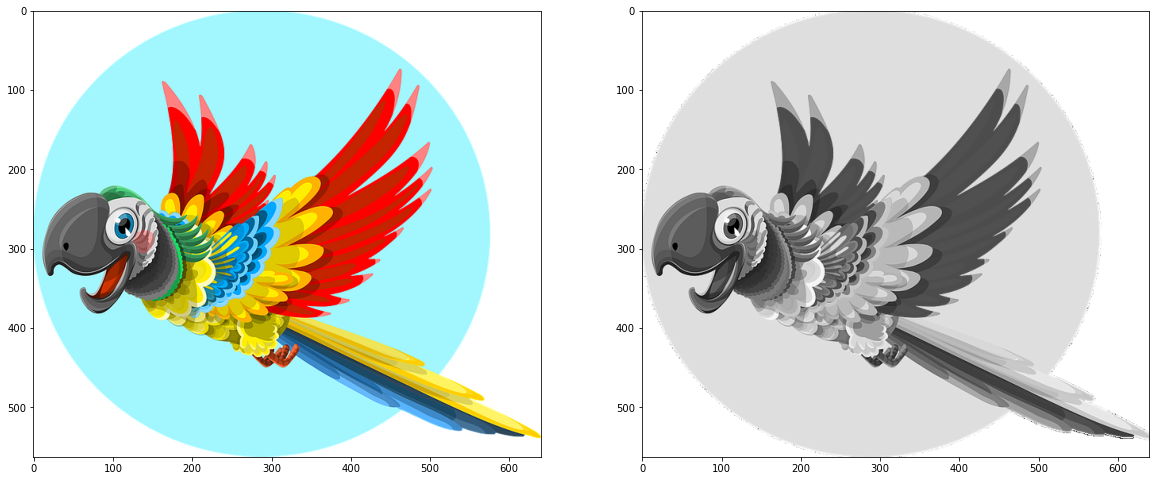

In [9]:
parrot = Image.open('img/parrot.png')
gray_parrot = parrot.convert('L')

# prikazi slike
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(np.asarray(parrot))
ax[1].imshow(np.asarray(gray_parrot),cmap='gray', vmin=0, vmax=255)

In [10]:
# pretvori sliku u niz
color_array = np.array(parrot)
gray_array = np.array(gray_parrot)

# transformiraj sliku tako da svi pikseli budu pohranjeni u jednodimenzionalnom nizu
shape = color_array.shape
color_array = color_array.reshape(1,shape[0]*shape[1],shape[2])
shape = gray_array.shape
gray_array = gray_array.reshape(1,shape[0]*shape[1])

# izračunaj skup jedinstvenih vrijednosti piksela i broj pojavljivanja pojedinog piksela
unique_col_px, col_px_counts = np.unique(color_array, return_counts = True, axis = 1)
unique_col_px = np.array([str(px) for px in unique_col_px[0,:]])
color_dict = dict(zip(unique_col_px.tolist(),col_px_counts.tolist()))
# print("Colored parrot pixel counts:", color_dict)
unique_gray_px, gray_px_counts = np.unique(gray_array, return_counts = True, axis = 1)
unique_gray_px = np.array([str(px) for px in unique_gray_px[0]])
gray_dict = dict(zip(unique_gray_px.tolist(),gray_px_counts.tolist()))
# print("Gray parrot pixel counts:", gray_dict)

# izracun gubitka informacije prilikom transformacije u crno-bijelu skalu
col_px_p = col_px_counts*(1/sum(col_px_counts))
gray_px_p = gray_px_counts*(1/sum(gray_px_counts))
H_col = sum(-col_px_p*np.log2(col_px_p))
H_gray = sum(-gray_px_p*np.log2(gray_px_p))
print(H_col*sum(col_px_counts) - H_gray*sum(gray_px_counts))
#ili
#idel_col = sum(-col_px_counts*np.log2(col_px_counts))
#idel_gray = sum(-gray_px_counts*np.log2(gray_px_counts))
#print(idel_col - idel_gray)

570710.5494434065


<a id =19> </a>
### Diskretno izvorište s memorijom

Kod izvorišta s memorijom, vjerojatnost pojavljivanja simbola ovisi o jednom ili više simbola koji su se prethodno pojavili. Takva izvorišta mogu se opisati Markovljevim procesima (tzv. Markovljeva izvorišta). Markovljev proces definira se skupom stanja i prijelazima iz jednog stanja u drugo s pridruženim vjerojatnostima.

Matematički, Markovljevo izvorište modeliramo kao diskretni slučajni proces $X$ s vrijednostima iz skupa stanja $S$ te vrijedi

<center> $p(X_{t_{n+1}}=x_{n+1}|X_{t_n}=x_n, X_{t_{n-1}}=x_{n-1}, ..., X_{t_0}=x_0) = p(X_{t_{n+1}}=x_{n+1}|X_{t_n}=x_n), $
    $\forall t_n, n \in \mathbb{N}_0$. </center>

Odnosno, buduće stanje $x_{n+1}$, odnosno vjerojatnost prijelaza u stanje $x_{n+1}$, ovisi samo o trenutačnom stanju, $x_n$.

Mi promatramo *Markovljeve procese (lance) prvog reda s konačnim brojem stanja* za koje vrijedi:
* Promatrani sustav može se opisati konačnim brojem stanja $n$. Sustav je u jednom trenutku u samo jednom stanju.
* Matrica uvjetnih prijelaza, $[p(x_j|x_i)], i,j=1,...,n$, definirana je za sve moguće prijelaze. Uvjetne vjerojatnosti ne mijenjaju se u vremenu.
* Polazno stanje sustava je poznato.

Za Markovljev lanac kažemo da je *ergodičan* ako:
* iz bilo kojeg stanja se može doći do bilo kojeg drugog stanja u konačnom broju koraka
* sustav teži graničnoj (stacionarnoj) razdiobi vjerojatnosti neovisno o polaznom stanju sustava kad $t \to \infty$.

Na slici je prikazan dijagram stanja vremenski diskretnog ergodičnog Markovljevog lanca.

![Markovljevo izvorište](img/markov_source_hr.png)

Za stacionarne vjerojatnosti stanja vremenski diskretnog ergodičnog Markovljevog lanca vrijedi:
    <center> $\sum_{i=1}^n p(x_i) = 1$ </center>
    <center> $[p(x_i)_{i=1,...,n}]=[p(x_1)\cdot\cdot\cdot p(x_n)][p(x_j|x_i)]$ </center>
        
Vlastiti sadržaj informacije za slučaj ovisnosti o simbolima definira se kao:
    <center> $H'(X)=-\sum_{i=1}^n \sum_{j=1}^m p(x_i,x_j) log_2 p(x_j|x_i)$ [bit/simbol] </center>
        
Vlastiti sadržaj informacije za slučaj neovisnosti među simbolima definiran je kao:
    <center> $H(X)=-\sum_{i=1}^n p(x_i) log_2 p(x_i)$ [bit/simbol] </center>

---
**Zadatak 6** <a id =110> </a>
Neka piksel neke jednostavne slike može poprimiti 5 različitih vrijednosti. Promatrajući sliku kao niz uzastopnih piksela (kao u prethodnom zadatku), ustanovljeno je da vrijednost promatranog piksela ovisi o njegovom prethodniku, i to tako da u 50% slučajeva piksel zadržava istu vrijednost, dok se u 25% slučajeva vrijednost piksela promijeni na prvu susjednu vrijednost (prvu manju odnosno veću od trenutne vrijednosti). Pikseli ekstremnih vrijednosti (najniže i najviše vrijednosti) također zadržavaju vrijednost u 50% slučajeva, dok u preostalim slučajevima vrijednost promijene u prvu susjednu. 

(a) Za ovako definiranu sliku odredite stacionarne vjerojatnosti pojave pojedinih vrijednosti piksela.

(b) Izračunajte entropiju izvorišta (vlastiti sadržaj informacije) uz pretpostavku neovisnosti među pikselima.

(c) Izračunajte entropiju izvorišta uz pretpostavku ovisnosti piksela.

(d) S obzirom na stvarne slike, komentirajte je li prikladnije sliku modelirati kao bezmemorijsko izvorište ili izvorište s memorijom. Zašto? Kakva je entropija odnosno količina informacije slike u tom slučaju?

Za izračun traženog možete simulirati kretanje po stanjima Markovljevog lanca pa stacionarne vjerojatnosti aproksimirati na temelju velikog broja ponavljanja, riješiti sustav linearnih jednadžbi (ručno ili [programski](https://riptutorial.com/numpy/example/16034/find-the-least-squares-solution-to-a-linear-system-with-np-linalg-lstsq)) ili koristiti neku od postojećih biblioteka (npr. [PyDTMC](https://github.com/TommasoBelluzzo/PyDTMC)). Neovisno o odabranom postupku, potrebno je prikazati postupak rješavanja.

In [11]:
# (a) izračun stacionarnih vjerojatnosti pojave piksela
p_xjIxi = [
    [.5 , .5,  0,  0,  0],
    [.25, .5,.25,  0,  0],
    [0  ,.25, .5,.25,  0],
    [0  ,0  ,.25, .5,.25],
    [0  ,0  ,0  , .5, .5]
] # [->]vektor*matrica = iduće stanje
#stacionarno stanje:
# 2p0 + p1 = 4*p0
# 2p0 + 2p1 + p2 = 4*p1
# p1 + 2*p2 + p3 = 4*p2
# p2 + 2*p3 + 2*p4 = 4*p3
# p3 + 2*p4 = 4*p4
# p1 = 2*p0
# 2*p0 + 4*p0 + p2 = 8*p0 => p2 = 2*p0
# 6*p0 + p3 = 8*p0 => p0 = 2*p0
# 6*p0 + 2*p4 = 8*p0 => p4 = p0
# 4*p0 = 4*p4 -> ok
# p0 + p1 + p2 + p3 + p4 = p0 + p0 + 6*p0 = 8*p0 = 1 => p0 = .125
p_X = np.array([.125, .25, .25, .25, .125])
print("Vjerojatnosti stacionarnog stanja: ", p_X)

# (b) entropija izvorišta za neovisne piksele
H_X = sum(-p_X*np.log2(p_X))
print("Entropija izvorišta za neovisne piksele: ", H_X, "[bit/simbol]")

# (c) entropija izvorišta za ovisne piksele
H2_X = 0
for i in range(5):
    pi = p_X[i]
    for j in range(5):
        pj_given_i = p_xjIxi[i][j]
        if pj_given_i:
                H2_X -= pi*pj_given_i*log2(pj_given_i) #p(x_i,x_j) = p(x_i)*p(x_j | x_i)
print("Entropija izvorišta za ovisne piksele:", H2_X, "[bit/simbol]")

Vjerojatnosti stacionarnog stanja:  [0.125 0.25  0.25  0.25  0.125]
Entropija izvorišta za neovisne piksele:  2.25 [bit/simbol]
Entropija izvorišta za ovisne piksele: 1.375 [bit/simbol]


(d) Prikladnije je sliku modelirati sliku kao izvorište s memorijom.

Intuitivno, ako je na slici bijeli oblak na nekom pikselu, vjerojatnije je da je neki drugi piksel u okolni također bijel. Općenito, u stvarnim slikama su obično boje susjednih piksela slične.

Ako modeliramo sliku kao memrojski izvor, entropija, odnosno količina informacije je manja.

<a id =111> </a>
### Diskretni komunikacijski kanal

Glavna karakteristika komunikacijskog kanala je kapacitet. Kapacitet predstavlja maksimalnu količinu informacije koju je moguće njime prenijeti. Iz pogleda komunikacijskog sustava (izvorište - kanal - odredište), količina informacije koja se prenosi od izvorišta do odredišta definirana je transinformacijom, a ona, osim o karakteristikama kanala, ovisi i o vjerojatnostima na ulazu kanala, $p(x_i)$. Dakle, kapacitet kanala je maksimum transinformacije s obzirom na različite distribucije ulaznih vjerojatnosti:

<center> $$C=\max_{\{p(x_i)\}} I(X;Y) \textrm{ [bit/simbol]}$$ </center>
    
Na sljedećim slikama prikazana su dva najjednostavnija binarna kanala (binarni simetrični kanal (BSC) te binarni kanal s brisanjem (BEC)) u obliku prijelaza između ulaznih i izlaznih simbola s pripadajućim vjerojatnostima. (Vjerojatnost $p_e$ predstavlja vjerojatnost pogreške, tj. vjerojatnost promjene simbola u kanalu, odnosno vjerojatnost brisanja simbola. Simbol $?$ predstavlja obrisani simbol.)
    
![Binarni kanali](img/binary_channels.png)
    





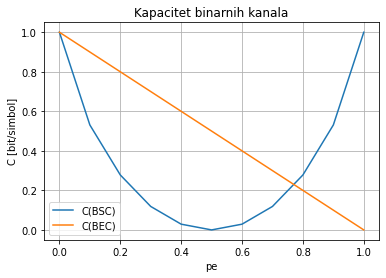

In [12]:
pe = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

C_bsc = 1 + pe*np.ma.log2(pe).filled(0)+(1-pe)*np.ma.log2(1-pe).filled(0)
C_bec = 1-pe

plt.plot(pe, C_bsc)
plt.plot(pe, C_bec)
plt.legend(["C(BSC)", "C(BEC)"])
plt.xlabel("pe")
plt.ylabel("C [bit/simbol]")
plt.title("Kapacitet binarnih kanala")
plt.grid()

**Zadatak 7** <a id =112> </a>
Komentirajte kapacitete binarnog simetričnog kanala i binarnog kanala s brisanjem prikazane na prethodnoj slici u ovisnosti o vjerojatnosti pogreške $p_e$. Koji je maksimalni kapacitet i u kojim situacijama se postiže? Objasnite! Povežite s informacijskim mjerama ovisnima o kanalu. Što se događa kada je kapacitet kanala jednak nuli ($C=0$ [bit/simbol])?

Odgovor za binarni kanal:

1) simetrični

Maksimalni kapacitet postižemo za $p_e$=0 ili $p_e$=1. U svakom drugom slučaju se postiže manji kapacitet. Kapacitet je $0 [bit/simbol]$ za $p_e$=1/2. Maksimum kapaciteta se postiže kada je vjerojatnost svakog izvorišnog simbola jednaka (tj. za maksimalnu entropiju izvora, a time je vjerojatnost pojave pojedinih simbola 1/2), a iznosi $1 [bit/simbol]$.


2) s brisanjem

Maksimalni kapacitet postižemo kada je vjerojatnost brisanja $p_e$=0, a iznosi $1 [bit/simbol]$. Kada nema greške u prijenosu, maksimalni kapacitet jednak je maksimalnoj entropiji (vjerojatnost pojedinog simbola je 1/2). U svakom drugom slučaju se postiže manji kapacitet. Kapacitet je $0 [bit/simbol]$ za vjerojatnost greške $p_e$=1.

3) zajedničko svojstvo:

Uz zadani $p_e$ i vjerojatnosti simbola na izvoru imamo formulu za transinformaciju, čiji maksimum tražimo derivacijama. Kada je kapacitet 0 bit/simbol, onda nam izlaz iz kanala ništa ne govori o ulazu u kanal.

<a id =2> </a>
## 2. Entropijsko kodiranje

Kodiranje je postupak dodjeljivanja *kodnih riječi* (kodova) simbolima poruke, a događa se u predajniku komunikacijskog sustava neposredno nakon generiranja simbola izvorišta. Dvije su osnovne vrste, odnosno cilja, kodiranja: *kompresija* (sažimanje) kojoj je cilj smanjiti veličinu poruke za slanje te *zaštitno kodiranje* koje poruci daje svojstva koja olakšavaju prijenos poruke u kanalu sa smetnjama. 

Osnovna svojstva metoda kompresije su:
* vrši li se kompresija s gubitkom ili bez gubitka informacije
* omjer kompresije.

Ovo poglavlje obrađuje metode kompresije bez gubitka informacije, odnosno entropijsko kodiranje. Za uvod o metodama kompresije s gubitkom informacije, studenti se upućuju na [udžbenik](#R), poglavlja 6 i 7 (opcionalno).

Pri kompresiji poruke bez gubitka informacije, odnosno entropijskom kodiranju, granica do koje se neka poruka može komprimirati, odnosno omjer kompresije, ovisi samo o statističkim karakteristikama izvora, odnosno njegovoj entropiji.

U praktičnim primjenama, kodiranje se većinom vrši u binarnoj abecedi (binarnom sustavu) pri čemu se kodne riječi sastoje od jedne ili više binarnih znamenki.

Vrste kodova:
* *nesingularni* - ako svakom simbolu dodjeljuje drukčiju kodnu riječ, $x_i \neq x_j \rightarrow C(x_i) \neq C(x_j)$
    * ne garantiraju jednoznačnu dekodabilnost kodnih riječi
* *jednoznačno dekodabilni* - ako za bilo koje dvije različite poruke proizvodi dvije različite kodirane poruke, $(x_1 x_2 ... x_n)_i \neq (x_1 x_2 ... x_n)_j \rightarrow C((x_1 x_2 ... x_n)_i) \neq C((x_1 x_2 ... x_n)_j)$
    * ne garantiraju mogućnost trenutnog dekodiranja, odnosno dekodiranja pojedinačne kodne riječi poruke odmah po njenom primitku
* *prefiksni* - kôd u kojem niti jedna kodna riječ nije prefiks neke druge kodne riječi
    * omogućavaju trenutno dekodiranje te su pogodni za praktične primjene
    
*Prosječna duljina kodne riječi*, $L(X)$, računa se kao zbroj duljina kodnih riječi za svaki simbol, $l(x_i)$ pomnoženih s vjerojatnostima pojavljivanja tog simbola, $p(x_i)$:

   <center>$$L(X)=\sum_{i=1}^n p(x_i) l(x_i) \textrm{ [bit/simbol]}$$</center>
    
*Efikasnost koda*, $\varepsilon$, definira se kao omjer entropije i prosječne duljine kodne riječi:
    <center>$$\varepsilon=\frac{H(X)}{L(X)} \leq 1 $$</center>
    
*Optimalni kôd* je prefiksni kôd s najmanjom mogućom prosječnom duljinom kodne riječi, koji pritom zadovoljava *Kraftovu nejednakost* (uvijet postojanja prefiksnog koda):

<center>$$\min \left[L(X)=\sum_{i=1}^n p(x_i) l(x_i)\right] \textrm{ uz uvjet } \sum_{i=1}^n d^{-l(x_i)}\leq 1 $$</center>

pri čemu je $d$ broj simbola u abecedi koda ($d=2$ za binarne kodove).

Nužan i dovoljan uvjet optimalnosti koda:

<center>$H(X) \leq L(X) < H(X)+1$</center>

<a id =21> </a>
### Shannon-Fano kodiranje

Uglavnom se ne koristi u praksi jer ne daje uvijek optimalan kôd, no zbog jednostavnosti olakšava razumijevanje osnovnih principa kodiranja.

Svojstva koda:
* niti jedna kodna riječ ne smije biti prefiks neke druge kodne riječi
* želimo da se u kodiranim porukama simboli 0 i 1 pojavljuju podjednakom vjerojatnošću

Metoda kodiranja:
1. simboli abecede se poslože po padajućim vjerojatnostima pojavljivanja
2. simboli se podijele u dvije grupe, tako da zbroj vjerojatnosti pojavljivanja simbola jedne i druge grupe bude podjednak
3. simbolima jedne grupe dodijeli se kao početak kodne riječi znamenka 0, a simbolima druge grupe znamenka 1
4. postupak 2 - 3 se ponavlja unutar svake grupe dok se grupe ne svedu na po jedan simbol

---
**Zadatak 8** <a id =22> </a>
Zadana je funkcija `shannon_fano_code`[<sup>1</sup>](#fn1) koja vjerojatnostima ili frekvencijama pojavljivanja simbola sortiranima od najveće prema najmanjoj pridružuje kodne riječi metodom kodiranja Shannon-Fano. U nastavku je dan primjer pozivanja navedene funkcije za izvorište s 5 simbola i frekvencijama pojavljivanja kao u kodu. Za prikazano kodiranje izračunajte (a) prosječnu (srednju) duljinu kodne riječi, $L$, (b) efikasnost koda, $\varepsilon$, te (c) odredite je li nastali kôd optimalan.

In [13]:
def shannon_fano_code(probabilities_sorted, codes, start, end):
    if start == end:
        return
    l = start
    r = end
    sum_left, sum_right = 0, 0
    while l <= r:
        if sum_left <= sum_right:
            sum_left += probabilities_sorted[l]
            l += 1
        else:
            sum_right += probabilities_sorted[r]
            r -= 1
    for i in range(start,l):
        codes[i] += '0'
    for i in range(l,end+1):
        codes[i] += '1'
        
    shannon_fano_code(probabilities_sorted, codes, start, l-1)
    shannon_fano_code(probabilities_sorted, codes, l, end)

    
## example run
X = ['1','2','3','4','5']
F_X = np.array([14, 7, 5, 5, 4])

# reversed sorting symbol-probability pairs with respect to probabilities
x_fx_pairs = zip(range(len(X)), X, F_X)
x_fx_sorted = sorted(x_fx_pairs, key = lambda x: x[2], reverse = True)
print("Symbol-frequency pairs sorted wrt. frequency:")
for x_fx in x_fx_sorted:
    print("x{0} = {1}, f(x{0}) = {2}".format(x_fx[0], x_fx[1], x_fx[2]))
    
# call encode_shannon_fano function
order, X, F_X = zip(*x_fx_sorted)
C_X = ['']*len(X)
shannon_fano_code(F_X, C_X, 0, len(X)-1)
x_cx_dict = dict(zip(X,C_X))
print("\nSymbol-code pairs:")
for x, cx in x_cx_dict.items():
    print(x, "-", cx)

Symbol-frequency pairs sorted wrt. frequency:
x0 = 1, f(x0) = 14
x1 = 2, f(x1) = 7
x2 = 3, f(x2) = 5
x3 = 4, f(x3) = 5
x4 = 5, f(x4) = 4

Symbol-code pairs:
1 - 00
2 - 01
3 - 10
4 - 110
5 - 111


In [14]:
# (a) prosječna (srednja) duljina kodne riječi
# ...

# (b) efikasnost koda
# ...

# (c) optimalnost koda
# ...

<a id =23> </a>
### Huffman kodiranje

Relativno jednostavna i često korištena metoda pronalaska optimalnog koda uz poznate vjerojatnosti pojavljivanja simbola.

Metoda kodiranja:
1. sortiraj simbole po padajućim vjerojatnostima
2. pronađi dva simbola s najmanjim vjerojatnostima
3. jednom od njih dodijeli simbol 0, a drugom 1
4. kombiniraj ta dva simbola u jedan nadsimbol (nadsimbol je novi simbol čija je vjerojatnost pojavljivanja jednaka zbroju vjerojatnosti pojavljivanja svaju simbola od kojih je nastao) i zapiši ih kao dvije grane binarnog stabla, a nadsimbol kao račvanje iznad njih
5. ponavljaj 1 - 4 dok ne dobiješ samo jedan nadsimbol
6. povratkom kroz stablo očitaj kodove

---
**Zadatak 9** <a id =24> </a>
Zadana je funkcija `huffman_code` (i ostale pomoćne funkcije)[<sup>1</sup>](#fn1) koja vjerojatnostima/frekvencijama pojavljivanja simbola sortiranima od najveće prema najmanjoj pridružuje kodne riječi metodom Huffman kodiranja. U nastavku je dan primjer pozivanja navedene funkcije za izvorište s 5 simbola i frekvencijama pojavljivanja kao iz prethodnog [zadatka](#22). Za prikazano kodiranje izračunajte (a) prosječnu duljinu kodne riječi, $L$, (b) efikasnost koda, $\varepsilon$, te (c) pokažite da je nastali kôd optimalan.

In [15]:
class Node:
    def __init__(self, symbol, probability):
        self.symbol = symbol
        self.probability = probability
        self.left = None
        self.right = None
    def __repr__(self):
        return ("(x="+str(self.symbol)+", p(x)="+str(self.probability)+")")
    @property
    def __lt__(self, other):
        return self.probability < other.probability
    def __gt__(self, other):
        return self.probability  > other.probability

def dict_to_nodes(probabilities):
    nodes = []
    for symbol in probabilities.keys():
        nodes.append(Node(symbol,probabilities[symbol]))
    return nodes

def get_codes(root, codeword="", codes_dict={}):
    #given the root of the Huffman code tree, traverses the tree and returns the code of every symbol
    if root.left == None and root.right == None:
        codes_dict[root.symbol] = codeword
    else:
        if root.left != None:
            get_codes(root.left, codeword+"0", codes_dict)
        if root.right != None:
            get_codes(root.right, codeword+"1", codes_dict)
    return codes_dict

def huffman_code(heap):
    #construct Huffman code tree given nodes in the heap
    while len(heap) > 1:
        edge1 = heapq.heappop(heap)
        edge2 = heapq.heappop(heap)
        node = Node("x",edge1.probability+edge2.probability)
        node.left = edge1
        node.right = edge2
        heapq.heappush(heap, node)
    root = heapq.heappop(heap)
    return root        #if heap only contains 1 node, that node is root. 

x_fx_dict = dict(zip(X,F_X))
heap = dict_to_nodes(x_fx_dict)
# print(heap)
heapq.heapify(heap) 
root = huffman_code(heap) 
x_cx_dict = get_codes(root)
print("\nSymbol-code pairs:")
for x, cx in x_cx_dict.items():
    print(x, "-", cx)


Symbol-code pairs:
1 - 0
5 - 100
3 - 101
4 - 110
2 - 111


In [16]:
# (a) prosječna duljina kodne riječi
# ...

# (b) efikasnost koda
# ...

# (c) optimalnost koda
# ...

---
**Zadatak 10** <a id =25> </a>
Usporedite efikasnost Shannon-Fano i Huffman kodiranja. Pronađite primjere (skupove simbola s pridruženim vjerojatnostima pojavljivanja) za koje ova dva kodiranja jesu, odnosno nisu jednako efektivna. (Opcionalno: generirajte nasumičnu poruku iz pronađenih izvorišta te ju kodirajte funkcijom `encode` za kodove generirane Shannon-Fano i Huffman metodama te usporedite dobivene kodirane poruke.)

In [17]:
def encode(message, codes_dict):
    #codes every symbol in the message according to the given codes (symbol-code dictionary)
    encoded_message = ""
    for symbol in message:
        encoded_message += codes_dict[symbol]
    return encoded_message

In [18]:
# usporedba Shannon-Fano i Huffman kodiranja
# ...

<sup id="fn1">1</sup><span id="fn1"> Implementacija Shannon-Fano i Huffman kodiranja zasniva se na usporedbi sa stranice [OpenGenus IQ](https://iq.opengenus.org/huffman-coding-vs-fano-shannon-algorithm/).</span>
<a id =26> </a>
### Aritmetičko kodiranje

Tretira čitavu poruku kao jedan simbol i preslikava je na jednu vrijednost iz intervala $[0,1\rangle$. Znatno je složenije, ali može postići bolje rezultate od Huffmanovog kodiranja.

Postupak kodiranja:
1. Podijeli interval $[0,1]$ u $n$ podintervala koj odgovarajju simbolima iz abecede; duljina svakog podintervala je proporcionalna vjerojatnosti pojavljivanja odgovarajućeg simbola.
2. Iz promatranog skupa podintervala, odaberi podinterval koji odgovara sljedećem simbolu u poruci.
3. Podijeli taj podinterval u $n$ novih podintervala, proporcionalno vjerojatnostima pojavljivanja simbola iz abecede; tako nastaje novi skup podintervala koji promatramo.
4. Ponavljaj korake 2 i 3 dok cijela poruka nije kodirana.
5. Konačni kôd za čitavu poruku je jedan broj iz intervala u binarnom obliku.

Kumulativni podskupovi za $X = \{x_1, x_2, ..., x_n\} \rightarrow [p(X)] = [p(x_1) p(x_2) ... p(x_n)]$:

|Simbol, $x_i$|$p(x_i)$|Kumulativni podskupovi, $[D_s, G_s\rangle$|
|---|-----|-----------------------------------------------|
|$x_1$|$p(x_1)$|$[0, p(x_1)\rangle$|
|$x_2$|$p(x_2)$|$[p(x_1),p(x_1)+p(x_2)\rangle$|
|$...$|$...$|$...$|
|$x_n$|$p(x_n)$|$\biggl[\sum_{i=1}^{n-1} p(x_i),1\biggr\rangle$|

Odabir koda: Prilikom kodiranja, bilo koja vrijednost iz odabranog podintervala u potpunosti definira podinterval, a time i kodiranu poruku. Međutim, pokazano je da je poruku moguće jednoznačno kodirati tako da se uzme neka vrijednost iz pripadajućeg podintervala, da se ona zapiše u binarnom obliku, te da se iz tog zapisa uzme prvih $l(x)$ binarnih znamenki, pri čemu je $l(x)$:

<center>$l(x)=\biggl\lceil log \frac{1}{P(x)}\biggr\rceil +1 \textrm{[bit],}$</center>

gdje je $P(x)$ duljina promatranog podintervala.

Budući da implementacija aritmetičkog kodiranja u Pythonu radi s decimalnim brojevima s potencialno velikim brojem znamenki, potrebno je utvrditi preciznost odabranog zapisa za pohranu decimalnog broja, budući da premala preciznost pohrane broja može uzrokovati neispravan rad algoritma. U nastavku je prikazana preciznost pohrane broja tipa `float`. Pretpostavljamo da je ova preciznost dovoljna za potrebe aritmetičkog kodiranja u sljedećim zadacima. 

In [19]:
# default Python float number precision
import sys
print("Preciznost float broja:", sys.float_info.dig)

Preciznost float broja: 15


Za razliku od Shannon-Fano i Huffman kodiranja, gdje je algoritam generiranja kodnih riječi na temelju distribucije vjerojatnosti za rezultat imao kodnu riječ za svaki simbol abecede, postupak kodiranja aritmetičkim kodom odjednom kodira cijelu poruku (niz simbola), neovisno o njenoj duljini, te pri tome ne stvara kodne riječi za preostale poruke. Postupak kodiranja aritmetičkim kodom prikazan je funkcijom `encode_arithmetic`.

In [20]:
def encode_arithmetic(message, X, P_X):
    P_X = np.insert(P_X, 0, 0.0)
    cum_probs = []
    D_s = 0.0
    G_s = 1.0
    
    for symbol in message:
        # get cumulative probabilities for current step
        cum_probs = np.cumsum(P_X)*(G_s-D_s)+D_s

        # select the appropriate subinterval based on current symbol
        symbol_idx = X.index(symbol)
        D_s = cum_probs[symbol_idx]
        G_s = cum_probs[symbol_idx+1]
        print("Simbol {}: [{},{})".format(symbol,D_s,G_s))
        
    return (D_s+G_s)/2


X = ['1','2','3']
P_X = np.array([0.8, 0.02, 0.18])

message = "1321"
code = encode_arithmetic(message, X, P_X)
print("\nPoruka: {}, kodna riječ: {}".format(message, code))
    

Simbol 1: [0.0,0.8)
Simbol 3: [0.6560000000000001,0.8)
Simbol 2: [0.7712000000000001,0.7740800000000001)
Simbol 1: [0.7712000000000001,0.7735040000000001)

Poruka: 1321, kodna riječ: 0.7723520000000001


---
**Zadatak 11** <a id =27> </a>
Zadano je diskretno bezmemorijsko izvorište s abecedom $X=\{a,b,c,d\}$ i vjerojatnostima pojavljivanja $[P(X)]=[0.1, 0.2, 0.3, 0.4]$. Koristeći dostupne funkcije za kodiranje, kodirajte poruku 'abcdcdd', izračunajte duljinu kodirane poruke u broju bitova te ju usporedite za različita kodiranja (Shannon-Fano, Huffman i aritmetičko kodiranje).

In [21]:
# duljina kodirane poruke za Shannon-Fano, Huffman i aritmetičko kodiranje
# ...

<a id =28> </a>
### Metode rječnika 

Prednost metoda riječnika je što vjerojatnosti pojavljivanja simbola ne moraju biti unaprijed poznate, te su zbog toga pogodne za izvore s memorijom. 

Algoritmi kodiranja metodama rječnika uzimaju kao ulaz nizove simbola promjenjive duljine i kodiraju ih kodnim riječima stalne duljine iz rječnika.

Rječnik može biti statičan ako unaprijed znamo karakteristike poruka koje ćemo kodirati, odnosno najučestalije riječi, no efikasnije je dinamički graditi rječnik te ga nadograđivati nadolazećim simbolima, čime se rječnik prilagođava karakteristikama izvora. Sve metode u praksi rade s dinamičkim rječnikom.
<a id =29> </a>
#### LZ77

Algoritam LZ77 kao rječnik koristi *posmični prozor* koji se sastoji od posljednjih $n$ kodiranih simbola poruke koja se kodira. *Prozor za kodiranje* je niz idućih $m$ simbola koje treba kodirati. 

![LZ77](img/lz77.png)

Postupak kodiranja:

```
sve dok (ProzorZaKodiranje nije prazan) {
	pronađi bilo gdje u PosmičnomProzoru najdulji slijed simbola koji je jednak
	slijedu simbola u ProzoruZaKodiranje gledano točno od njegovog početka, zapiši (pomak, duljina); 
	ako je (duljina > 0) {
        izlaz iz kodera (pomak, duljina, sljedeći simbol); % Sljedeći simbol mora uvijek bit u prozoru za kodiranje;
		pomakni PosmičniProzor i ProzorZakodiranje za duljina+1 simbol u poruci (u desno); 
	} inače {
		izlaz iz kodera (0, 0, prvi simbol u ProzoruZaKodiranje);
		pomakni PosmičniProzor i ProzorZakodiranje za 1 simbol u poruci (u desno);
	}
}
```

Izlaz iz kodera zapisuje su u obliku (*pomak*, *duljina*, *sljedeći simbol*), pri čemu *pomak* označava broj simbola od kraja posmičnog prozora do pronađenog niza, *duljina* je duljina pronađenog niza, a *sljedeći simbol* je simbol koji dolazi u prozoru za kodiranje neposredno nakon pronađenog niza.

Nedostatak ovog algoritma je što pamti samo nizove simbola unutar posmičnog prozora (njegova memorija je relativno kratka). Za ostvarenje kompresije, poruka mora sadržavati ponovljene nizove simbola unutar duljine posmičnog prozora. U najgorem slučaju, ako je izvor periodičan, a period mu je samo malo duži od duljine posmičnog prozora, kodiranje je izuzetno loše jer se nikada ne uspije uhvatiti ponovljeni niz simbola.

Implementacija algoritma LZ77 dana je u direktoriju ove bilježnice, u poddirektoriju /codes. Pozivanje funkcije `encode_lz77` prikazano je u sljedećem odsječku koda.

In [22]:
coded = encode_lz77("abaabbabaacaacabb", 6, 5)
print(coded)

[(0, 0, 'a'), (0, 0, 'b'), (2, 1, 'a'), (3, 1, 'b'), (6, 4, 'c'), (3, 4, 'b'), (1, 1, '*')]


---
**Zadatak 12** <a id =210> </a>
Analizirajte omjer kompresije ostvaren algoritmom LZ77 s obzirom na veličine posmičnog prozora i prozora za kodiranje. Istu poruku kodirajte algoritmom LZ77 s različitim veličinama prozora, rezultate prikažite tekstualno ili na grafu. Objasnite dobivene rezultate. Primjer koda dan je u nastavku.

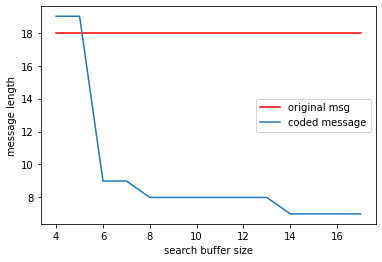

In [23]:
message = "abcdefabcdefabcdef"

search_buffer = range(4,18)
search_buff_look_ahead_buff_diff = [1,2,3,4]

coded_length = []

for sb in search_buffer:
    look_ahead_buffer = sb-1
    coded = encode_lz77(message, sb, look_ahead_buffer)
    #print("sb={}, coded:{}".format(sb,coded))
    coded_length.append(len(coded))
        

plt.plot(search_buffer, [len(message)]*len(search_buffer), 'red')
plt.plot(search_buffer, coded_length)

plt.xlabel("search buffer size")
plt.ylabel("message length")
plt.legend(["original msg","coded message"])

<a id =211> </a>
#### LZW

Algoritam LZW je poboljšanje algoritma LZ78 (poboljšane verzije algoritma LZ77). Metoda kreće s početnim rječnikom koji sadrži sve osnovne simbole abecede, čime se izbjegava potreba slanja koda sljedećeg simbola i šalje se samo indeks u rječnik.

Postupak kodiranja:
```
RadnaRiječ : = ’ ’;
sve dok (postoje simboli poruke na ulazu kodera) {
    NoviSimbol : = uzmi s ulaza sljedeći simbol poruke;
    ako (RadnaRiječ+NoviSimbol postoji u rječniku) {
        RadnaRiječ : = RadnaRiječ+NoviSimbol;
    } inače {
        izlaz iz kodera (indeks za RadnuRiječ);
        dodaj RadnaRiječ+NoviSimbol u rječnik;
		RadnaRiječ : = NoviSimbol;
    }
}

```

In [24]:
D = ['#','A','B','C','D']
coded = encode_lzw(D, "BABAABAAA")
print(coded)

[2, 1, 5, 6, 1, 9]


---
**Zadatak 13** <a id =211> </a>
Za poruku iz prethodnog [zadatka](#210) stvorite početni rječnik za kodiranje metodom LZW te istu kodirajte. Usporedite duljinu kodirane poruke dobivenu algoritmima LZ77 i LZW te objasnite razlike u metodama kodiranja u smislu dobivene kodirane poruke i eventualnih predkoraka koje je potrebno napraviti za uspješno kodiranje (uz pretpostavku da se poruka kodira kod pošiljatelja, a dekodira kod primatelja).

In [25]:
# kodiranje poruke metodom LZW
# ...

# usporedba duljina kodirane poruke (LZ77 i LZW)
# ...

<a id =3> </a>
## 3. Zaštitno kodiranje

Zaštitno kodiranje je postupak dodjeljivanja zaštitnih kodnih riječi simbolima kodirane poruke. Slijed zaštitnih kodnih riječi formira zaštitno kodiranu poruku.

Izvršava se u koderu kanala, a koristi se kako bi se smanjio utjecaj šuma u kanalu na odaslane poruke, odnosno spriječio gubitak poruke. 
    
Zaštitnim se kodiranjem porukama dodjeljuju kodne riječi veće prosječne duljine od prosječne duljine poruka. To omogućuje da dekoder na odredištu otkrije pogrešku nastalu prilikom prijenosa. Cilj je iskoristiti onaj zaštitni kôd koji uvodi najmanje moguće povećanje prosječne duljine poruke, a u isto vrijeme osigurava prihvatljivo malu vjerojatnost da pogreške simbola zaštitno kodirane poruke nastale pri prijenosu ostanu neotkrivene.

Ukoliko dođe do otkrivanja pogreške na primljenoj zaštitnoj kodnoj riječi, pokreće se postupak otklanjanja pogreške. Otklanjanje pogreške može se vršiti u dekoderu kanala pomoću posebnih svojstava zaštitnog koda za otklanjanje i ispravljanje pogreške ili mehanizmom ponovnog slanja poruke.

Zaštitni se kodovi dijele u dvije osnovne skupine:
* blok kodovi - k-bitnu poruku preslikavaju u n-bitnu kodnu riječ (pripadaju koderima bez memorije)
* konvolucijski kodovi - generiraju bit kodne riječi kao funkciju trenutačnog stanja ulaza kodera i prethodnih stanja (pripadaju memorijskim kodovima)

Osim ove podjele, zaštitni kodovi se još dijele na linearne i nelinearne, pri čemu linearnost označava svojstvo da se svaka kodna riječ može izraziti kao linearna kombinacija drugih kodnih riječi. Linearnim kodovima pripadaju blok, konvolucijski i turbo kodovi.

Oznaka blok koda: $K(n, M, d(K))$ ili $K[n, k, d(K)]$ 
* $n$ – duljina kodne riječi
* $M$ – maksimalan broj kodnih riječi koda $K$
* $d(K)$ – minimalna udaljenost koda

<center>$M= 2^k$</center> 

* $k$ - broj podatkovnih bitova u kodnoj riječi (poruka)

Udaljenost (distanca) koda, $d(K)$:

<center>$$d(K) = \min_{\mathbf{x},\mathbf{y} \in K}⁡(d(\mathbf{x},\mathbf{y}) | \mathbf{x} \neq \mathbf{y})$$</center>

* $\mathbf{x}, \mathbf{y}$ – kodne riječi koda $K$

Svojstva Hammingove udaljenosti:

* $d(x,y)=0$ ako i samo ako $x = y$
* $d(x,y)= d(y,x), \forall x,y \in K$
* $d(x,y) \leq d(x,z) + d(z,y), \forall x,y,z \in K$

Sposobnost otkrivanja pogrešaka, $s$:

<center>$s=d(K)- 1$</center>

Sposobnost ispravljanja pogrešaka, $t$:

<center>$$t = \biggl\lfloor \frac{d(K)- 1}{2}\biggr\rfloor$$</center>

Hammingova međa:

<center>$$ M \leq \frac{2^n}{\sum_{i=0}^t \binom{n}{i}}$$</center>

Za perfektan kôd vrijedi jednakost u gornjem izrazu.

Svojstva linearnih binarnih blok kodova ($\forall x,y \in K$, $a \in F_2=\{0,1\}$):

* $x+y \in K$
* $a \cdot x \in K$

Vjerojatnost ispravnog dekodiranja za binarni simetrični kanal:

<center>$$ p= \sum_{i=0}^n \binom{n}{i} p_g^i(1-p_g)^{n-i}$$</center>

* $p_g$ – vjerojatnost pogreške bita

Kodna brzina koda, $R(K)$ ili $R$:

<center>$$R(K)= \frac{k}{n} \leq 1$$</center>


Razmatramo nekoliko zaštitnih kodiranja: paritetno kodiranje, Hammingovo kodiranje, ciklično kodiranje i konvolucijsko kodiranje. 

<a id =31> </a>
### Paritetno kodiranje

Paritetno kodiranje je najjednostavnija klasa blok kodova koja se koristi u praksi. Služi isključivo za otkrivanje pogreški u primljenoj kodnoj riječi. Izvodi se dodavanjem zalihosnog simbola/bita poruci tako da zbroj jedinica u kodnoj riječi bude paran ili neparan (tzv. horizontalna provjera zalihosti). Zalihosni bit se u tom slučaju naziva paritetni bit.

U praksi se paritetno kodiranje provodi uvođenjem zajedničkih paritetnih bitova za više uzastopnih poruka. U tom slučaju, za koder s primjerice $m$ kodnih poruka, nakon njihovog kodiranja se formira posebna kodna riječ s bitovima koji predstavljaju paritetne bitove svih i-tih simbola poruka. Ovo se još zove vertikalna provjera zalihosti.

---
**Zadatak 14** <a id =32> </a>
Sljedeći kôd predstavlja koder koji kodira horizontalnom i vertikalnom provjerom zalihosti parnim paritetom. Nadopunite linije koda koje nedostaju za generiranje zalihosnih simbola. Komentirajte može li se pomoću ovakvog kodera otkriti i/ili ispraviti pogreška, i ako da, na koji način.

In [26]:
# broj poruka
m = 4
# duljina poruke
k = 3

# matrica poruka
msg_matrix = np.random.randint(0,2,m*k).reshape(m,k)
print("Nekodirane poruke:\n", msg_matrix)

# dodaj mjesto za paritetni bit
msg_matrix = np.append(msg_matrix, np.zeros((m,1), dtype=int), axis=1)
msg_matrix = np.append(msg_matrix, np.zeros((1,k+1), dtype=int), axis=0)
print("\nNekodirane poruke i 0 na mjestu zalihosnih bitova:\n", msg_matrix)

# postavi paritetne bitove
#for row in msg_matrix[:-1]:
    # posljednja znamenka redka -> paritetni bit redka
    # row[k] = ...

#znamenke u posljednjem retku -> paritetni bit stupca
# ...

print ("\nZaštitne kodne riječi:\n", msg_matrix)

Nekodirane poruke:
 [[0 1 1]
 [1 1 1]
 [1 1 0]
 [0 0 0]]

Nekodirane poruke i 0 na mjestu zalihosnih bitova:
 [[0 1 1 0]
 [1 1 1 0]
 [1 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]

Zaštitne kodne riječi:
 [[0 1 1 0]
 [1 1 1 0]
 [1 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]


<a id =33> </a>
### Hammingovo kodiranje

Hammingov kôd je bilo koji linearni blok kôd čija matrica provjere pariteta $\mathbf{H}$ ima $r$ redaka, a u stupcima ima sve moguće vektore dimenzije $r>1$ osim vektora $\mathbf{0}$.

Svojstva Hamminggovog koda, Ham($r$):
* linearan blok kôd $[2^r-1,2^r-1-r]$
* ima najmanju udaljenost 3 (otkriva dvostruku i ispravlja jednostruku pogrešku)
* perfektan kôd

U nastavku je prikazano korištenje Hammingovog kodera iz biblioteke [`scikit_dsp_comm`](https://scikit-dsp-comm.readthedocs.io/en/latest/nb_examples/Block_Codes.html).

---
**Zadatak 15**
<a id =34> </a>
Provjerite svojstvo Hammingovog koda da otkriva dvostruku i ispravlja jednostuku pogrešku za Hammingov koder iz biblioteke u kodu. Kodirajte proizvoljnu poruku, simulirajte pogreške promjenom nekih bitova kodirane poruke te istu dekodirajte.

In [27]:
parity_bits = 3
ham = block.FECHamming(parity_bits)
print("k = {}\nn = {}\nH = \n{}\nG = \n{}\n".format(ham.k, ham.n, ham.H, ham.G))

message = np.random.randint(0,2,ham.k)
print("message: ", message)
coded_message = ham.hamm_encoder(message.astype(int))
print("coded message: ", coded_message)

# simuliranje greške u kodiranoj poruci
# ...

decoded_message = ham.hamm_decoder(coded_message.astype(int))
print("decoded message:", decoded_message)

k = 4
n = 7
H = 
[[1 1 0 1 1 0 0]
 [1 1 1 0 0 1 0]
 [1 0 1 1 0 0 1]]
G = 
[[1 0 0 0 1 1 1]
 [0 1 0 0 1 1 0]
 [0 0 1 0 0 1 1]
 [0 0 0 1 1 0 1]]

message:  [1 1 1 0]
coded message:  [1. 1. 1. 0. 0. 1. 0.]
decoded message: [1 1 1 0]


<a id =35> </a>
### Ciklično kodiranje

Ciklični kodovi su linearni blok kodovi sa svojstvom da se cikličnim posmicanjem jedne kodne riječi uvijek dobiva neka kodna riječ iz istog cikličnog koda. 

U nastavku je prikazano korištenje biblioteke iz prethodnog [zadatka](#34) za kodiranje cikličnim kodom.

In [28]:
# stvori koder na temelju koeficijenata generirajućeg polinoma
cyc = block.FECCyclic('1011')

x = np.zeros((16,4), dtype=int)
for i in range(0,16):
    xbin = block.binary(i,4)
    xbin = np.array(list(xbin)).astype(int)
    x[i,:] = xbin
#print("possible messages:\n", x)

print("message for coding:", x[4])
codeword = cyc.cyclic_encoder(x[4])
print("codeword:",codeword)
decoded_message = cyc.cyclic_decoder(codeword)
print("decoded message:", decoded_message)

message for coding: [0 1 0 0]
codeword: [0 1 0 0 1 1 1]
decoded message: [0 1 0 0]


---
**Zadatak 16** <a id =36> </a>
Zadana je funkcija `transmission` koja simulira slanje poruke kanalom sa šumom. Na temelju 100 kodiranih, odaslanih i dekodiranih poruka izračunajte vjerojatnost pogrešnog dekodiranja poruke pri primatelju (odnosno udio neuspješno dekodiranih poruka). Koristite ciklični koder iz prethodnog primjera. Opcionalno: komentirajte šum koji "proizvodi" funkcija `transmission` u smislu vjerojatnosti pojave pogrešaka te usporedite dobivenu vjerojatnost s rezultirajućom vjerojatnosti pogrešnog dekodiranja.

In [29]:
def transmission(message):
    mask = np.random.rand(len(message))>0.9
    return (message+mask)%2

wrong_decoded = 0

#for i in range(100):
    # generiraj poruku
    # message = ...
    # kodiraj poruku
    # coded_message = ...
    # simuliraj slanje poruke
    # received_message = ...
    # dekodiraj poruku
    # decoded_message = ...
    # ako je poruka neispravno dekodirana, povećaj broj neispravno dekodiranih poruka
    # ...
    
# izračunaj vjerojatnost pogrešnog dekodiranja
# ...

<a id =37> </a>
### Konvolucijsko kodiranje

Konvolucijski kodovi mogu se promatrati kao poseban slučaj linearnih blok kodova. Razlikuju se u dvije važne stavke:
* konvolucijski kodovi spadaju u grupu memorijskih kodova, tj. generiranje $n$-tog bita u kodnoj riječi ovisi ne samo o trenutačnom ulaznom bitu kodera nego i o $k$ prethodnih ulaznih bitova
* kodna riječ kod konvolucijskih kodova može u svojoj duljini biti beskonačna jer i izvorna poruka može biti beskonačna u svojoj duljini, što je u suprotnosti s blok kodovima

Kod ovog tipa kodiranja pojedinačni blok bitova ne predstavlja kodnu riječ. Kodna riječ predstavljena je kontinuiranim slijedom bitova i ista nastaje prolaskom izvorne poruke kroz linearni posmačni registar s konačnim brojem memorijskih stanja - $m$.

---
**Opcionalno: Zadatak 17** <a id =38> </a>
Pomoću biblioteke iz prethodnih zadataka ([`scikit_dsp_comm`](https://scikit-dsp-comm.readthedocs.io/en/latest/nb_examples/Block_Codes.html)) prikažite rad proizvoljnog konvolucijskog kodera. Objasnite što je sve potrebno za definiranje kodera te na koji način se vrši kodiranje i dekodiranje.

## Literatura:
<a id =R> </a>
1) I. S. PANDŽIĆ, A. BAŽANT,. Ž. ILIĆ, Z. VRDOLJAK, M. KOS, V. SINKOVIĆ, Uvod u teoriju informacije i kodiranje. 2. izdanje, Element, 2009.

2) Ž. ILIĆ, A. BAŽANT, T. BERIŠA, Teorija informacije i kodiranje – zbirka zadataka. 3. izdanje, Element, 2013.
